# Patterns that determine computer games success

From open sources, we have access to historical data on game sales, user and expert ratings, genres and platforms for the period from 1980 to the present. We will identify patterns that determine the success of the game in order to bet on a potentially popular product and plan advertising campaigns for the next year.

The data in the 'games.csv' file contains the following information:
- Name - the name of the game
- Platform - platform
- Year_of_Release - year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - Critics score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating — rating from the ESRB (Entertainment Software Rating Board). This association determines the rating of computer games and assigns them an appropriate age category.

## General information

In [1]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
games = pd.read_csv('games.csv')

GENERAL INFORMATION:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



FIRST 10 ROWS:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN



NUMBER OF DUPLICATES: 0

NUMBER OF MISSING VALUES BY COLUMNS:

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

DATA DISTRIBUTION IN COLUMNS:


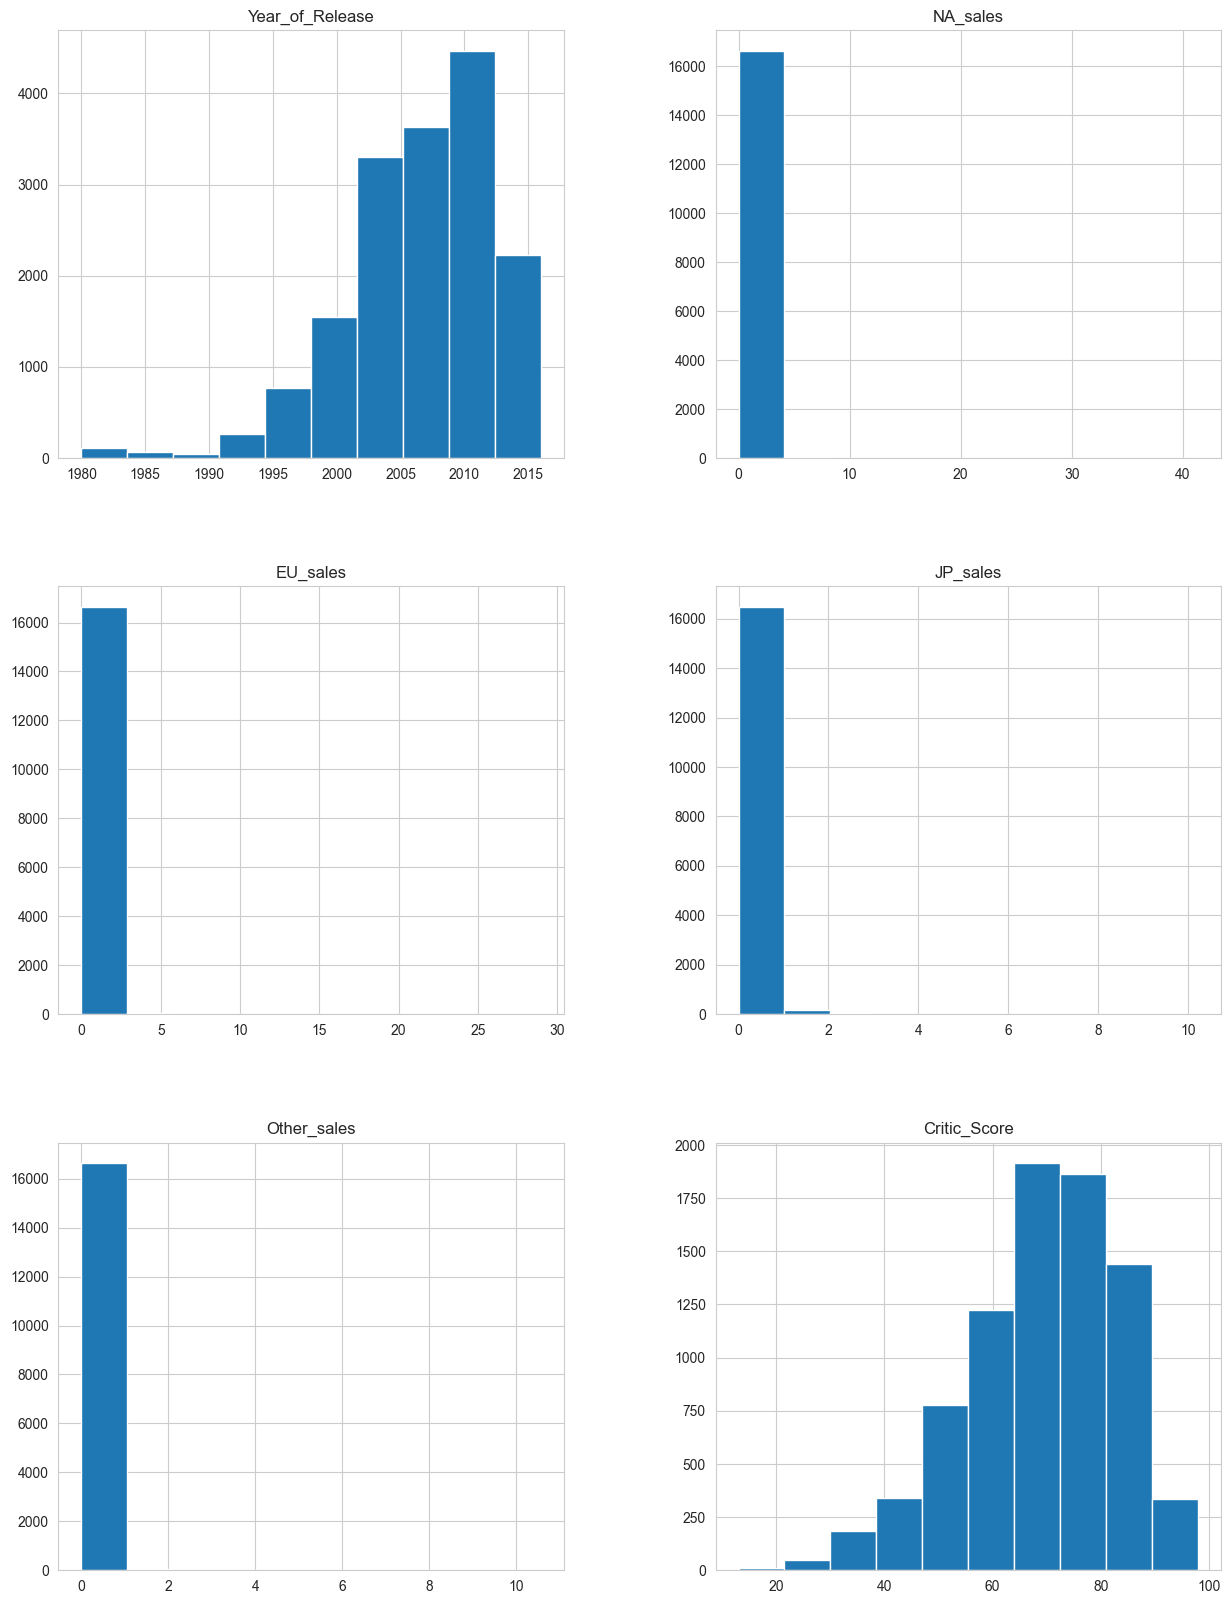

In [3]:
def dataset_data(dataset):
    pd.set_option('display.max_columns', None)
    print('\033[1m' + 'GENERAL INFORMATION:' + '\033[0m', end='\n\n')
    dataset.info()
    display(dataset.describe())
    print()
    print('\033[1m' + 'FIRST 10 ROWS:' + '\033[0m')
    display(dataset.head(10))
    print()
    print('\033[1m' + 'NUMBER OF DUPLICATES:' + '\033[0m', 
          dataset.duplicated().sum(), end='\n\n')
    print('\033[1m' + 'NUMBER OF MISSING VALUES BY COLUMNS:' + '\033[0m', 
          dataset.isna().sum(), sep='\n\n', end='\n\n')
    print('\033[1m' + 'DATA DISTRIBUTION IN COLUMNS:' + '\033[0m')
    dataset.hist(figsize=(15, 20));
    
dataset_data(games)

- The dataset is represented by 16,715 rows.
- It contains information about the global sales of computer games and their ratings for the period from 1980 to 2016. At the same time, more than half of the data are games released over the past 10 years.
- There are gaps in some columns. Most of them are missing computer game rating values.
- There are no complete duplicates.
- All column names require changes according to accepted rules.
- The `'User_Score'` column has a data type that does not match the description: strings instead of numbers.

## Data preprocessing

### Column names
Change the column names to lowercase.

In [4]:
games.rename(columns={
             'Name': 'name',
             'Platform': 'platform',
             'Year_of_Release': 'year_of_release',
             'Genre': 'genre',
             'NA_sales': 'na_sales',
             'EU_sales': 'eu_sales',
             'JP_sales': 'jp_sales',
             'Other_sales': 'other_sales',
             'Critic_Score': 'critic_score',
             'User_Score': 'user_score',
             'Rating': 'rating'
} 
             ,inplace=True
)

### Data type
The columns `'na_sales'`, `'eu_sales'`, `'jp_sales'`, `'other_sales'`, `'critic_score'`, `'year_of_release'` are converted from `float64` to `float32` to save memory.

In [5]:
games = games.astype({
    'na_sales': 'float32',
    'eu_sales': 'float32',
    'jp_sales': 'float32',
    'other_sales': 'float32',
    'critic_score': 'float32',
    'year_of_release': 'float32'
}
    ,errors='ignore'
)

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float32
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float32
 5   eu_sales         16715 non-null  float32
 6   jp_sales         16715 non-null  float32
 7   other_sales      16715 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float32(6), object(5)
memory usage: 1.0+ MB


Let's now look at the `'user_score'` column and see where the `object` values come from.

In [7]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

All values are floating point numbers - except for the abbreviation 'tbd'. An Internet search gives the most probable interpretation of it: to be determined. That is, the score has not yet been determined due to the lack of feedback from users. I propose to work with it in the same way as with passes.

### Add columns
#### `total_sales` - Total sales around the world
Let's calculate the total sales for each game.

In [8]:
games['total_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

### Passes
#### `genre`
Let's start with the gaps in the `'genre'` column. There are only two of them. So if these strings contain data about the name of games, we can find information about their genres on the Internet.

In [9]:
games[games.genre.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


It turned out that these two gaps exactly matched the two gaps in the `'name'` column. These lines are not very informative, so let's just delete them.

In [10]:
games.dropna(subset=['genre'], inplace=True)

#### `year_of_release`
There are too many gaps in this column to fill them in manually, looking up the year of release of the game by its name. However, their relative number is small. So let's leave them unchanged.

#### `rating`
The relative number of gaps in this column exceeds 30%. Therefore, they must be processed very carefully so as not to change the overall picture.\
First, let's look at what ratings the ESRB assigns.

In [11]:
games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

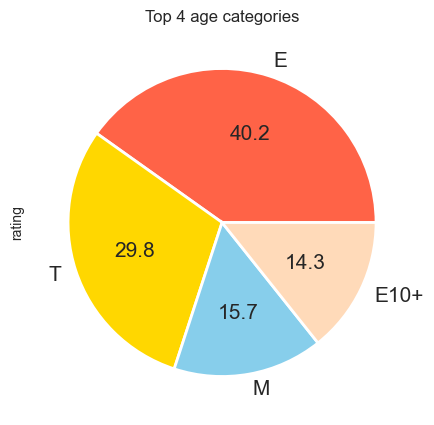

In [12]:
games.rating.value_counts()[:4].plot(kind='pie',
                                     labels=list(games.rating.value_counts().index)[:4],
                                     wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
                                     autopct='%.1f',
                                     figsize=(5, 5),
                                     textprops={'fontsize': 15},
                                     colors=['tomato', 'gold', 'skyblue', 'peachpuff']
);

plt.title('Top 4 age categories')

games.rating.value_counts()

According to information from the ESRB website, rating codes are decoded as follows:
- `E` - everyone - for persons of any age (and from 1994 to 1998 this category was called `K-A`);
- `M` - mature 17+ - for persons over 17 years old;
- `T` - teen - for persons over 13 years old;
- `E10+` - everyone 10+ - for people over 10 years old;
- `K-A` - kids to adults - for persons of any age (used from 1994 to 1998, equal to `E`);
- `AO` - adults only - for persons over 18 years old;
- `EC` - early childhood - games aimed at preschool audience;
- `RP` - rating pending - in the process of evaluation.

I propose to replace the category `K-A` with `E` as they mean the same age limit.

In [13]:
games.loc[games.rating == 'K-A', 'rating'] = 'E'

Let's try to determine what rating the games of each genre most often receive. If the relationship between these two parameters is quite strong, it will be possible to fill in the gaps with high accuracy.\
We will also see in which genres the rating is more often missed.

In [14]:
games.groupby('genre').rating.value_counts()

genre         rating
Action        T          681
              M          608
              E10+       481
              E          416
              AO           1
              EC           1
Adventure     E          162
              T          115
              M           99
              E10+        68
              EC           2
Fighting      T          362
              M           49
              E10+        19
              E            8
Misc          E          458
              T          239
              E10+       167
              M           13
              EC           5
Platform      E          358
              E10+       144
              T           64
              M            3
Puzzle        E          289
              E10+        43
              T           10
Racing        E          585
              T          172
              E10+        96
              M           18
              RP           1
Role-Playing  T          420
              M       

Number of rating skips for each genre:

In [15]:
games[games.rating.isna()].groupby('genre').genre.count()

genre
Action          1181
Adventure        857
Fighting         411
Misc             868
Platform         319
Puzzle           238
Racing           377
Role-Playing     721
Shooter          304
Simulation       305
Sports           839
Strategy         344
Name: genre, dtype: int64

We see that gaps in the values ​​of the age rating are found for all genres of games.
- For games in the `'Sports'' genre, it is safe to say that they will receive an `'E'` rating (78% of games have this).
- `'Puzzle'' games are also the most frequently rated `'E'` (85%).
- The `'Platform'` genre is usually rated `'E'` and `'E10+'`.
- In 67% of games, games in the `'Racing'` category are ESRB ``E'`.

We can fill in the gaps for these categories with the rating value `'E'`.
- Genre `'Fighting'` corresponds to `'T'` in 82% of cases.
- Half the time `'Shooter'' games are rated `'M''.

Fill in the gaps in accordance with the above patterns. We will assign the value `'undefined'` to all the rest.

In [16]:
games.loc[(games.rating.isna()) & (games.genre.isin(['Sports', 'Puzzle', 'Platform', 'Racing'])), 'rating'] = 'E'
games.loc[(games.rating.isna()) & (games.genre == 'Fighting'), 'rating'] = 'T'
games.loc[(games.rating.isna()) & (games.genre == 'Shooter'), 'rating'] = 'M'
games.loc[games.rating.isna(), 'rating'] = 'undefined'

games.rating.isna().sum()

0

Let's see how the distribution by age ratings has changed.

E            5766
undefined    4276
T            3372
M            1867
E10+         1420
EC              8
RP              3
AO              1
Name: rating, dtype: int64

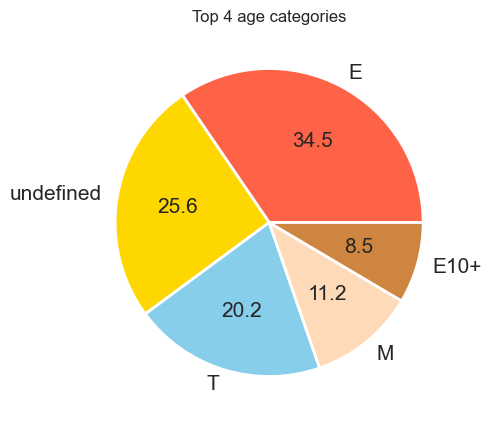

In [17]:
games.rating.value_counts()[:5].plot(kind='pie',
                                     label='',
                                     labels=list(games.rating.value_counts().index)[:5],
                                     wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
                                     autopct='%.1f',
                                     figsize=(5, 5),
                                     textprops={'fontsize': 15},
                                     colors=['tomato', 'gold', 'skyblue', 'peachpuff', 'peru']
);

plt.title('Top 4 age categories')

games.rating.value_counts()

Games for which we populated the ESRB rating with `'undefined'` are now in second place. However, the positions of the other groups have not changed. `E` is still the most numerous, followed by `T`, `M` and `E10+`. This is good: at least we did not change the overall picture when filling in the gaps.

#### `critic_score` & `user_score`
In half of the available rows, there are gaps in the values ​​of the assessment of critics and users. Let's check if both of these values are often missed for one game.

In [18]:
len(games[(games.critic_score.isna()) & (games.user_score.isna())])

6661

It turns out that almost all gaps occur in the same lines. Most likely this is due to an error when unloading data.\
In view of the fact that there are too many missing values in these columns, we will leave them unchanged and focus on the analysis of the data at our disposal. Note that the `user_score` column also contains `'tbd'` values. We will also convert them into gaps.

In [19]:
games.loc[games.user_score == 'tbd', 'user_score'] = float('NaN')

Now we will convert the data type in the column to `float32` and check that all the above changes are correctly made to the table.

In [20]:
games.user_score = pd.to_numeric(games.user_score, errors='ignore')
games = games.astype({'user_score': 'float32'}, errors='ignore')

games.info()
games.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float32
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     8137 non-null   float32
 9   user_score       7590 non-null   float32
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float32
dtypes: float32(8), object(4)
memory usage: 1.1+ MB


name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
total_sales           0
dtype: int64

**All gaps have been filled in where possible and data has been converted to the correct types.**

## Exploratory data analysis
### `year_of_relese` - Year of release

Number of games released up to and including 1993: 365


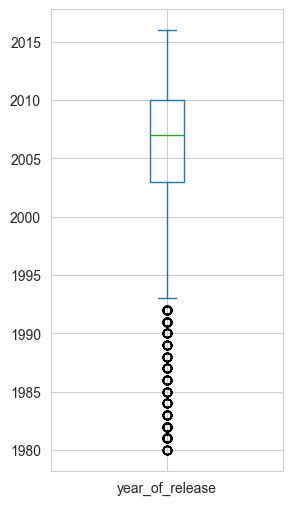

In [21]:
games.year_of_release.plot.box(
    figsize=(3, 6), 
    grid=True
);

print('Number of games released up to and including 1993:', len(games[games.year_of_release <= 1993]))

We see that until 1993, inclusive, games were released quite piece by piece. Therefore, in the future, we will consider the period [1994, 2016].

In [22]:
games_most = games[games.year_of_release >= 1994]

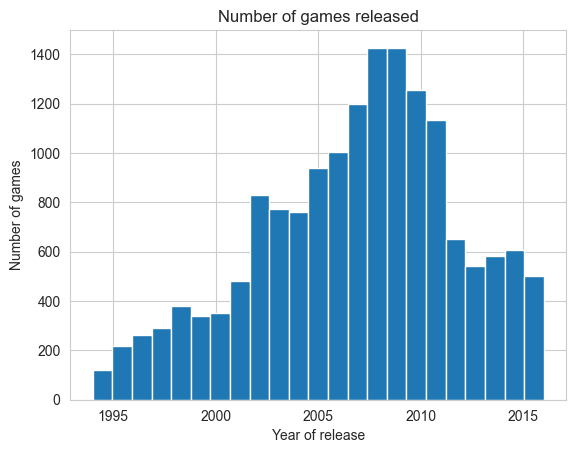

In [23]:
plt.title('Number of games released')
plt.xlabel('Year of release')
plt.ylabel('Number of games')

games_most.year_of_release.hist(
     bins=len(games_most.year_of_release.unique()),
);

From the beginning of the study period to a powerful peak in 2008-2009, the number of games released annually has steadily increased. There has been a significant decline since 2010. At the moment, the release has returned to the values ​​of 2001 (~ 500 games per year) and is one third of the maximum.

I think the decline is due to the advent of smartphones and the development of mobile games on them. Now it is not necessary to buy a game console, you can simply use the existing gadget.

### `platform` - Platform
First, let's look at the list of all platforms presented in the dataset, as well as the number of games released on them.

In [24]:
games_most.platform.value_counts()

PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       950
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SAT      173
WiiU     147
SNES     144
GB        67
DC        52
GEN       12
NG        10
WS         6
SCD        5
3DO        3
TG16       2
NES        1
PCFX       1
Name: platform, dtype: int64

Let's study the top ten platforms, the total sales of games for which were the highest. Note that among them there are only outdated models at the moment, that is, they have already overcome the peak of their popularity.

The biggest difference in positions in the two ratings (in terms of the number of games released and copies sold) is observed in `PS4`. With an average range of games available on this platform, their sales volume is one of the largest in the world. This is despite the fact that the game console is still at the beginning of its life cycle.

In [25]:
print('\033[1m' + 'TOTAL SALES WORLDWIDE (million):' + '\033[0m')
games_most.groupby('platform').total_sales.sum().sort_values(ascending=False).head(10)

TOTAL SALES WORLDWIDE (million):


platform
PS2     1233.559937
X360     961.239990
PS3      931.339966
Wii      891.179993
DS       802.760010
PS       727.580017
PS4      314.140015
GBA      312.880005
PSP      289.529999
3DS      257.809998
Name: total_sales, dtype: float32

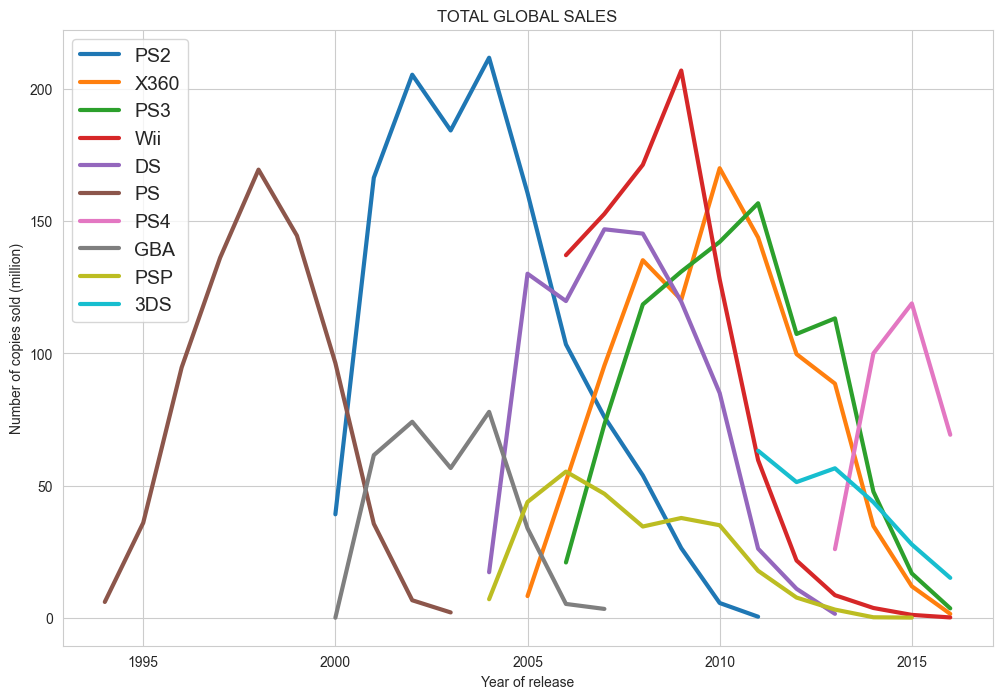

In [26]:
top_platforms = list(
     games_most
     .groupby('platform')
     .total_sales
     .sum()
     .sort_values(ascending=False)
     .head(10)
     .index
)

for platform in top_platforms:
    (
         games_most[games_most.platform == platform]
         .groupby('year_of_release')
         .total_sales
         .sum()
    ).plot(
         label=platform,
         title='TOTAL GLOBAL SALES',
         xlabel='Year of release',
         ylabel='Number of copies sold (million)',
         legend=True,
         grid=True,
         figsize=(12, 8),
         linewidth=3
    )
    plt.legend(fontsize=14)

Let's calculate the average lifetime of the platforms included in the top 10 displayed above in terms of global sales.

In [27]:
# group the dataframe with popular platforms by their name and take the first and last years of their presence on the market
lifespan_table = (
     games_most[games_most.platform.isin(top_platforms)]
     .pivot_table(index='platform', values='year_of_release', aggfunc=['max', 'min'])
     .reset_index()
)
# calculate the average difference between these indicators
(lifespan_table[('max', 'year_of_release')] - lifespan_table[('min', 'year_of_release')]).mean()

8.6

- On average, the life cycle of a platform is 8.6 years. The peak of sales usually occurs in its middle.
- Some platforms already from the first year of release demonstrate high sales rates of games created for them. The `Wii` stands out in particular, starting at the highs of most game consoles.
- The `3DS` platform, on the contrary, does not have a clear extremum: sales of games on it have been falling since the very moment of release.
- Seemingly promising `PS4` has shown a significant decline over the past year, uncharacteristic of other platforms.

Thus, in order to make a forecast for 2017 and identify the set-top boxes that are gaining popularity, **you should take data for the last 5 years**. This is about half the life cycle of the platform. It is not advisable to bet on games released for aging platforms - their sales will plummet.\
Let's update the filter for the `games_most` dataframe: include only games released in the selected **actual period** - 2012-2016.

In [28]:
games_most = games_most[games_most.year_of_release >= 2012]

Let's build a similar chart, but for all platforms presented in the current period.

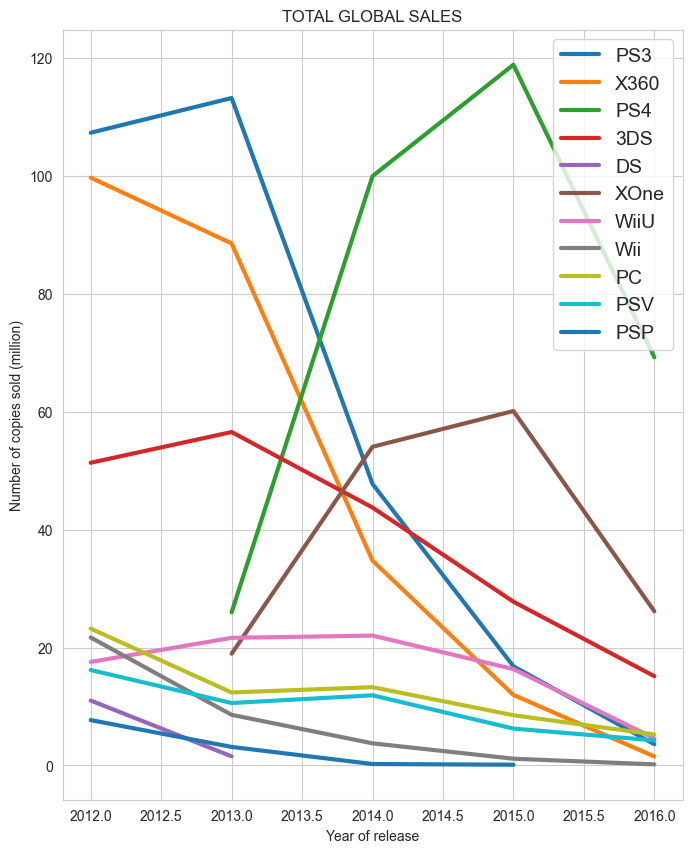

In [29]:
latest_platforms = list(games_most.platform.unique())

for platform in latest_platforms:
    (
        games_most[games_most.platform == platform]
        .groupby('year_of_release')
        .total_sales
        .sum()
    ).plot(
        label=platform,
        title='TOTAL GLOBAL SALES',
        xlabel='Year of release',
        ylabel='Number of copies sold (million)',
        legend=True,
        grid=True,
        figsize=(8, 10),
        linewidth=3
    )
    plt.legend(fontsize=14)

There are three platforms that will not potentially demonstrate near-zero sales next year. These are currently leading
- **`XOne`**
- **`PS4`**
- **`3DS`**

The data of past years show that all of them have already overcome the peak of their popularity. In addition, for none of the platforms, the graph of the number of sales by years is similar to those of the former "record holders" - PS, PS2, Wii.\
That is, we should not count on a sensation and over-sales. But we have identified platforms that are still popular at the moment.

### `total_sales` - Total sales by platform

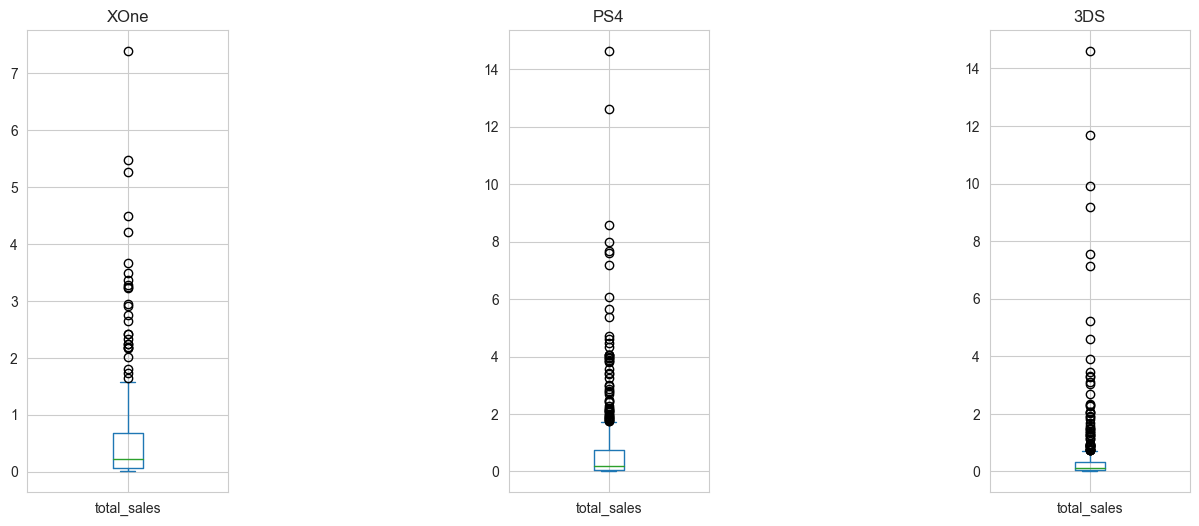

In [30]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 3)
ax3 = fig.add_subplot(1, 5, 5)

games_most[games_most.platform == 'XOne'].total_sales.plot.box(
    title='XOne',
    grid=True,
    ax=ax1,
    figsize=(15, 6)
);

games_most[games_most.platform == 'PS4'].total_sales.plot.box(
    title='PS4',
    grid=True,
    ax=ax2,
);

games_most[games_most.platform == '3DS'].total_sales.plot.box(
    title='3DS',
    grid=True,
    ax=ax3,
);

We can see that the sales of the vast majority of games are in the hundreds of thousands. And only a small percentage diverges with a circulation of several million.\
There are games that are an order of magnitude larger than the bulk.

### `user_score` , `critic_score` - Impact of ratings on sales
Let's take a look at how user and critic ratings affect game sales within the same platform.

USER SCORE
Pearson correlation coefficient (user_score - total_sales)
XOne: -0.06892505829722285
PS4: -0.03195710560396696
3DS: 0.1975826066732986



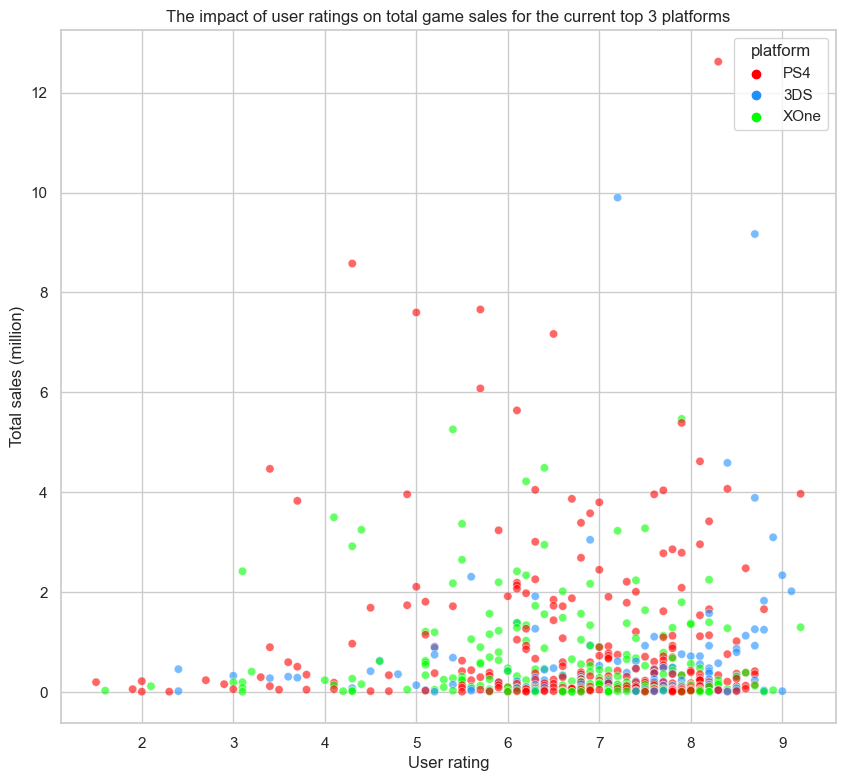

CRITIC SCORE
Pearson correlation coefficient (critic_score - total_sales)
XOne: 0.41699832684400107
PS4: 0.4065679010283494
3DS: 0.32080286662937324



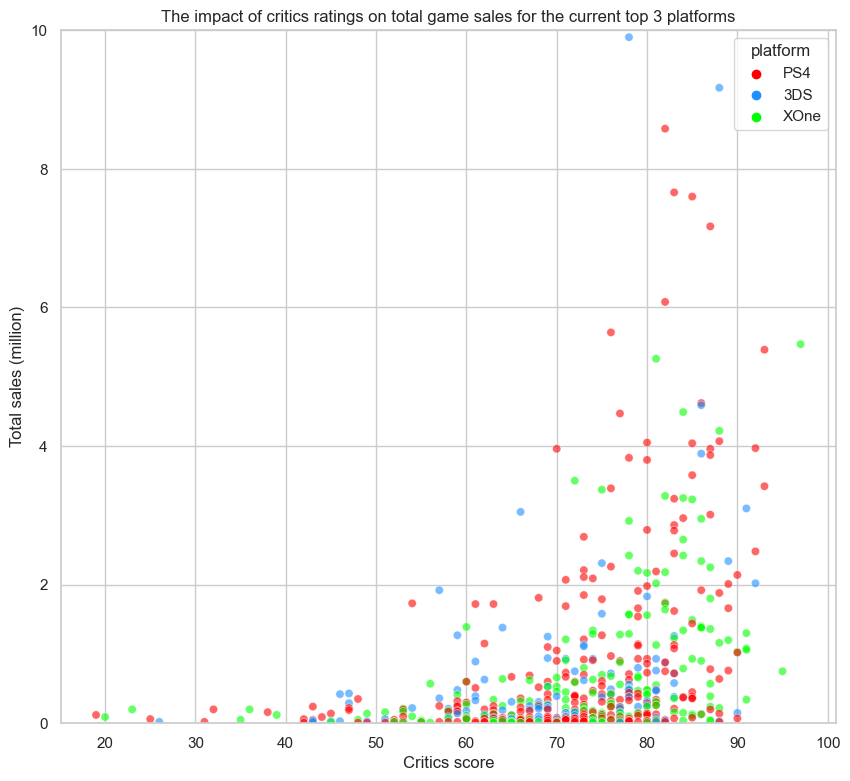

In [31]:
sns.set(rc={'figure.figsize':(10, 9)})
sns.set_style("whitegrid")

print('\033[1m' + 'USER SCORE' + '\033[0m')
print('Pearson correlation coefficient (user_score - total_sales)')

print('\033[1m' + 'XOne:' + '\033[0m', 
      games_most[games_most.platform == 'XOne'].user_score
     .corr(games_most[games_most.platform == 'XOne'].total_sales))

print('\033[1m' + 'PS4:' + '\033[0m', 
      games_most[games_most.platform == 'PS4'].user_score
     .corr(games_most[games_most.platform == 'PS4'].total_sales))

print('\033[1m' + '3DS:' + '\033[0m', 
      games_most[games_most.platform == '3DS'].user_score
     .corr(games_most[games_most.platform == '3DS'].total_sales))
print()
sns.scatterplot(
    data=games_most[games_most.platform.isin(['XOne', 'PS4', '3DS'])],
    x='user_score',
    y='total_sales',
    hue='platform',
    palette=['red', 'dodgerblue', 'lime'],
    alpha=0.6,
);

plt.title('The impact of user ratings on total game sales for the current top 3 platforms')
plt.xlabel('User rating')
plt.ylabel('Total sales (million)')
plt.show()

print('\033[1m' + 'CRITIC SCORE' + '\033[0m')
print('Pearson correlation coefficient (critic_score - total_sales)')

print('\033[1m' + 'XOne:' + '\033[0m', 
      games_most[games_most.platform == 'XOne'].critic_score
     .corr(games_most[games_most.platform == 'XOne'].total_sales))

print('\033[1m' + 'PS4:' + '\033[0m', 
      games_most[games_most.platform == 'PS4'].critic_score
     .corr(games_most[games_most.platform == 'PS4'].total_sales))

print('\033[1m' + '3DS:' + '\033[0m', 
      games_most[games_most.platform == '3DS'].critic_score
     .corr(games_most[games_most.platform == '3DS'].total_sales))
print()

plt.ylim(0, 10)
sns.scatterplot(
    data=games_most[games_most.platform.isin(['XOne', 'PS4', '3DS'])],
    x='critic_score',
    y='total_sales',
    hue='platform',
    palette=['red', 'dodgerblue', 'lime'],
    alpha=0.6,
);

plt.title('The impact of critics ratings on total game sales for the current top 3 platforms')
plt.xlabel('Critics score')
plt.ylabel('Total sales (million)')
plt.show()

`User rating` has almost no effect on the sales success of the game. This is especially noticeable for platforms `PS4` and `XOne`: in the range of user ratings of 3 - 6, many games have sold abnormally large circulation (2 - 8 million copies).

Things are different with `critics` evaluation. All of the platforms reviewed showed an average positive correlation between the assigned score and the number of sales. Games rated 60 or higher sold many times more than the rest. And only a few games that scored 80+ points sold more than 10 million copies.\
Critics score below 50 practically deprives the game of the chances of success.

Let's check if there is a similar relationship between `critic_score` and `total_sales` on other platforms.

CRITIC SCORE
Pearson correlation coefficient (critic_score - total_sales)
Other platforms: 0.26627536119791984


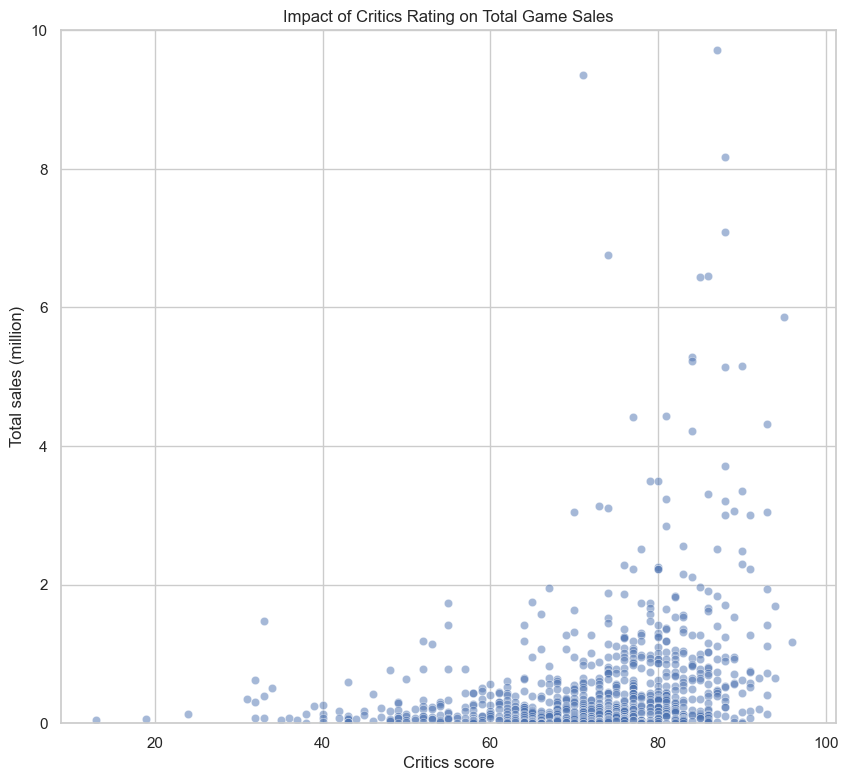

In [32]:
print('\033[1m' + 'CRITIC SCORE' + '\033[0m')
print('Pearson correlation coefficient (critic_score - total_sales)')

print('\033[1m' + 'Other platforms:' + '\033[0m',
    games_most[~games_most.platform.isin(['XOne', 'PS4', '3DS'])].critic_score
    .corr(games_most[~games_most.platform.isin(['XOne', 'PS4', '3DS'])].total_sales)
)

plt.ylim(0, 10)
sns.scatterplot(
    data=games_most[~games_most.platform.isin(['XOne', 'PS4', '3DS'])],
    x='critic_score',
    y='total_sales',
    alpha=0.5,
);

plt.title('Impact of Critics Rating on Total Game Sales')
plt.xlabel('Critics score')
plt.ylabel('Total sales (million)')
plt.show()

The correlation is weaker, but still present. All conclusions made for the top three can be extended to other models.

### `genre` - Distribution by genre
Consider the distribution of sales and the number of released games by top 10 genres for the three currently leading platforms.

NUMBER OF GAMES BY GENRE


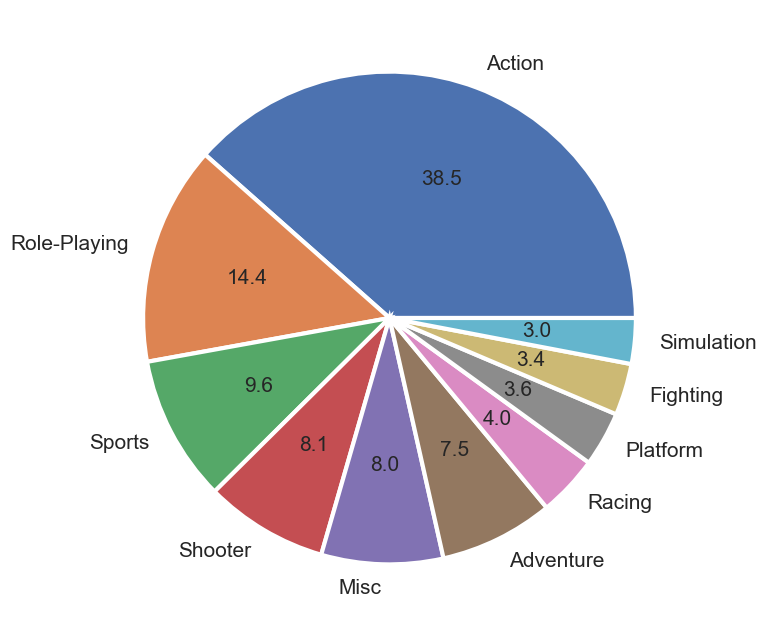

NUMBER OF SALES BY GENRE


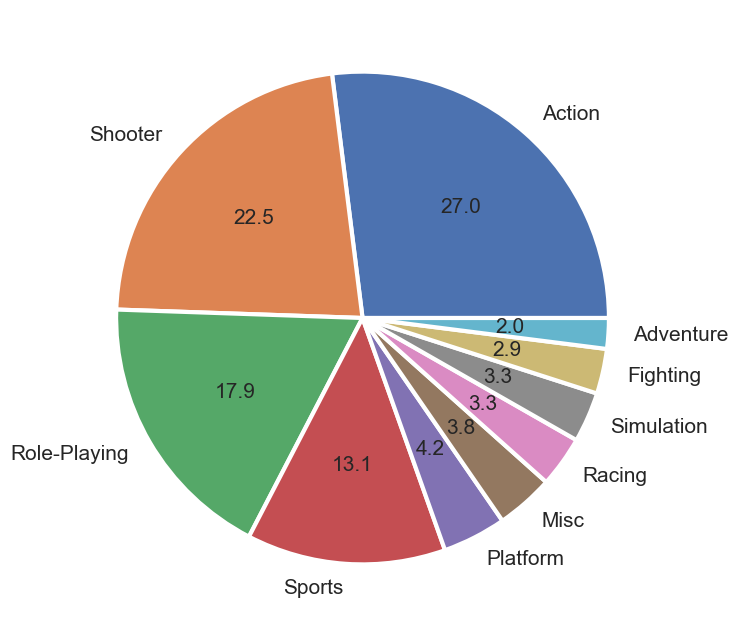

In [33]:
print('\033[1m' + 'NUMBER OF GAMES BY GENRE' + '\033[0m')
(
    games_most[games_most.platform.isin(['XOne', 'PS4', '3DS'])]
    .genre
    .value_counts()
    .sort_values(ascending=False)
    .head(10)
).plot(
    kind='pie',
    labels=(
        games_most[games_most.platform.isin(['XOne', 'PS4', '3DS'])]
        .genre
        .value_counts()
        .sort_values(ascending=False)
        .head(10)
        .index
    ),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    figsize=(8, 8),
    textprops={'fontsize': 15}
);
plt.show()


print('\033[1m' + 'NUMBER OF SALES BY GENRE' + '\033[0m')
(
    games_most[games_most.platform.isin(['XOne', 'PS4', '3DS'])]
    .groupby('genre')
    .total_sales
    .sum()
    .sort_values(ascending=False)
    .head(10)
).plot(
    kind='pie',
    labels=(
        games_most[games_most.platform.isin(['XOne', 'PS4', '3DS'])]
        .groupby('genre')
        .total_sales
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .index
    ),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    figsize=(8, 8),
    textprops={'fontsize': 15}
);

It is interesting to consider the inconsistencies of positions in these two rankings:
- Although almost 40% of games are released in the `Action` genre, their sales make up only a quarter of the total. Similar difference between `Adventure` and `Misc`, but on a smaller scale.
- Another market leader - `Role-Playing` - is sold according to the number of released games. Just like `Fighting`, `Platform`, `Racing` and `Simulation`.
- Things are going great with `Shooter` games. With an output share of less than 10%, their sales amount to almost 25%. A similar but less pronounced difference is seen in `Sports`.

**Thus, I would name `Shooter`, `Role-Playing` and `Sports` as the most profitable genres.**

## User portrait by region (NA, EU, JP)
### `platform`

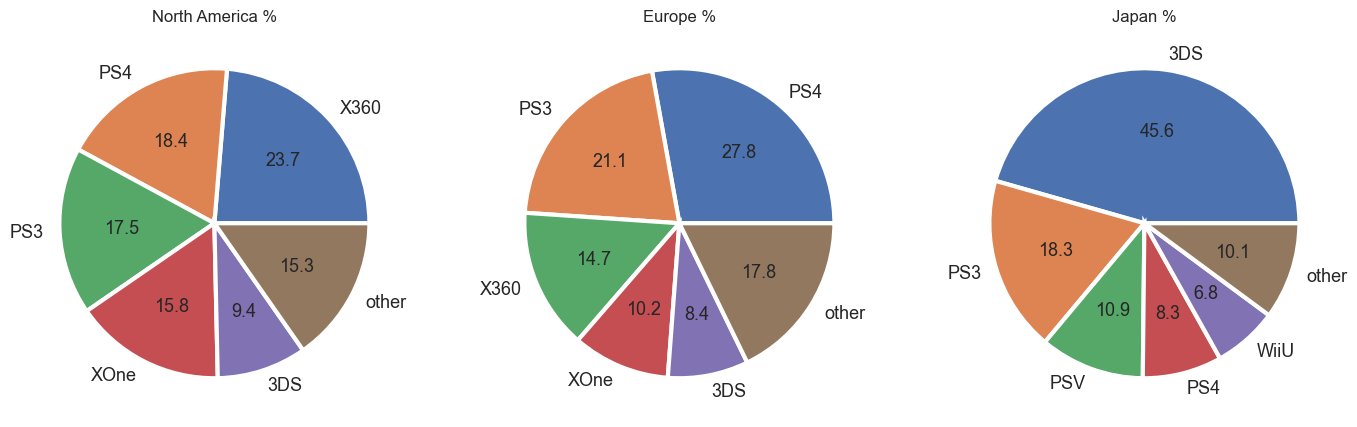

In [34]:
na_top_platforms = games_most.groupby('platform').na_sales.sum().sort_values(ascending=False).head()
na_other_platforms_sum = games_most.groupby('platform').na_sales.sum().sort_values(ascending=False)[5:].sum()
na_top_platforms['other'] = na_other_platforms_sum

eu_top_platforms = games_most.groupby('platform').eu_sales.sum().sort_values(ascending=False).head()
eu_other_platforms_sum = games_most.groupby('platform').eu_sales.sum().sort_values(ascending=False)[5:].sum()
eu_top_platforms['other'] = eu_other_platforms_sum

jp_top_platforms = games_most.groupby('platform').jp_sales.sum().sort_values(ascending=False).head()
jp_other_platforms_sum = games_most.groupby('platform').jp_sales.sum().sort_values(ascending=False)[5:].sum()
jp_top_platforms['other'] = jp_other_platforms_sum


fig = plt.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

na_top_platforms.plot(
    kind='pie',
    title='North America %',
    labels=(na_top_platforms.index),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    figsize=(17, 7),
    textprops={'fontsize': 13},
    ax=ax1
);

eu_top_platforms.plot(
    kind='pie',
    title='Europe %',
    labels=(eu_top_platforms.index),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    textprops={'fontsize': 13},
    ax=ax2
);

jp_top_platforms.plot(
    kind='pie',
    title='Japan %',
    labels=(jp_top_platforms.index),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    textprops={'fontsize': 13},
    ax=ax3
);
plt.show()

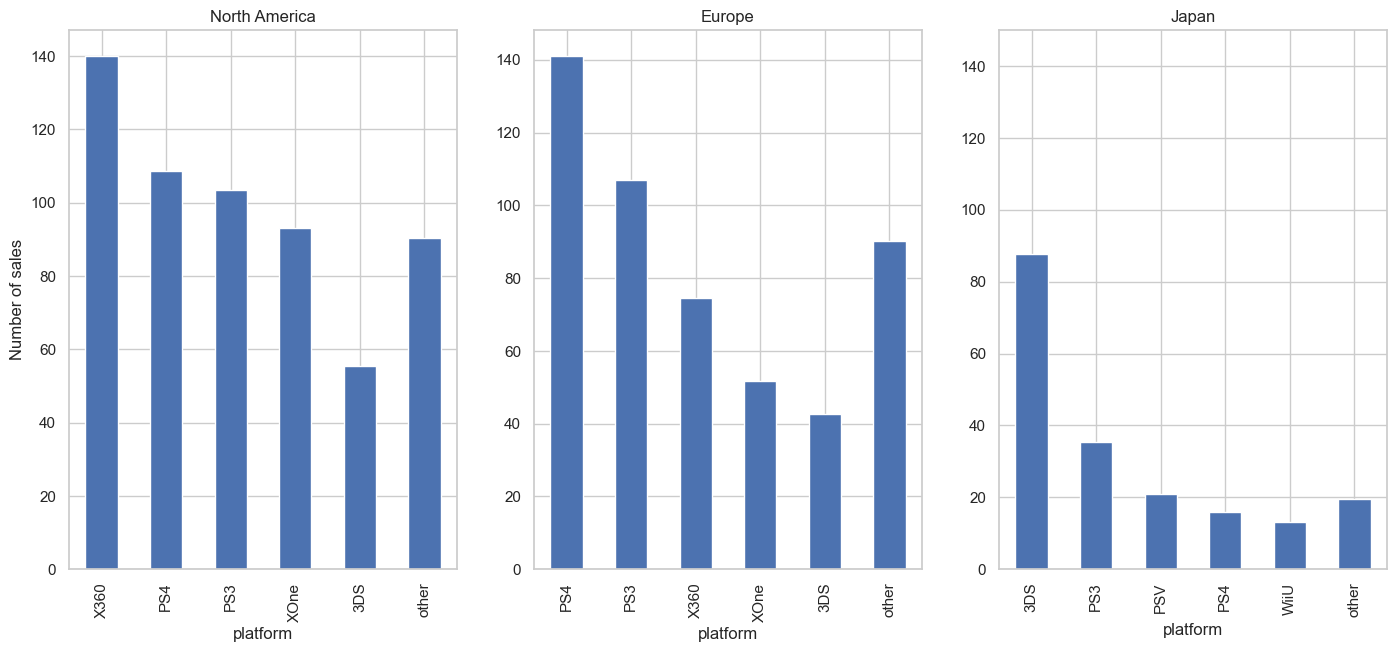

In [35]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_ylabel('Number of sales')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_ylim(0, 150)

na_top_platforms.plot(
    kind='bar',
    title='North America',
    label='',
    figsize=(17, 7),
    ax=ax1
);

eu_top_platforms.plot(
    kind='bar',
    title='Europe',
    label='',
    ax=ax2
);

jp_top_platforms.plot(
    kind='bar',
    title='Japan',
    label='',
    ax=ax3
);
plt.show()

- In North America, there is a noticeable preference for platforms manufactured by Microsoft: games on both `X360` and `XOne` were bought there in larger quantities than in Europe. In the Japanese rating, games released for these platforms are not present at all.
- Sales of games on Playstation (`PS3` and `PS4`) in Europe account for half of the total.
- Games created for the Nintendo `3DS` platform are sold in Europe and America on a small scale (slightly less than 10% of the market in both cases). At the same time, in Japan, this platform is the absolute leader - 45% of all game sales.

### `genre`

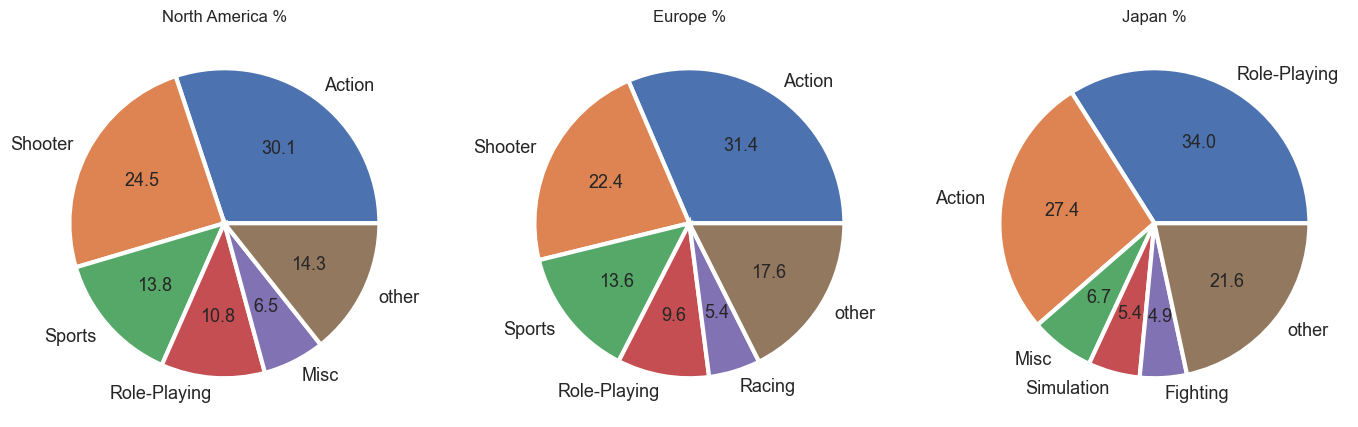

In [36]:
na_top_genres = games_most.groupby('genre').na_sales.sum().sort_values(ascending=False).head()
na_other_genres_sum = games_most.groupby('genre').na_sales.sum().sort_values(ascending=False)[5:].sum()
na_top_genres['other'] = na_other_genres_sum

eu_top_genres = games_most.groupby('genre').eu_sales.sum().sort_values(ascending=False).head()
eu_other_genres_sum = games_most.groupby('genre').eu_sales.sum().sort_values(ascending=False)[5:].sum()
eu_top_genres['other'] = eu_other_genres_sum

jp_top_genres = games_most.groupby('genre').jp_sales.sum().sort_values(ascending=False).head()
jp_other_genres_sum = games_most.groupby('genre').jp_sales.sum().sort_values(ascending=False)[5:].sum()
jp_top_genres['other'] = jp_other_genres_sum


fig = plt.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

na_top_genres.plot(
    kind='pie',
    title='North America %',
    labels=(na_top_genres.index),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    figsize=(17, 7),
    textprops={'fontsize': 13},
    ax=ax1
);

eu_top_genres.plot(
    kind='pie',
    title='Europe %',
    labels=(eu_top_genres.index),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    textprops={'fontsize': 13},
    ax=ax2
);

jp_top_genres.plot(
    kind='pie',
    title='Japan %',
    labels=(jp_top_genres.index),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    textprops={'fontsize': 13},
    ax=ax3
);

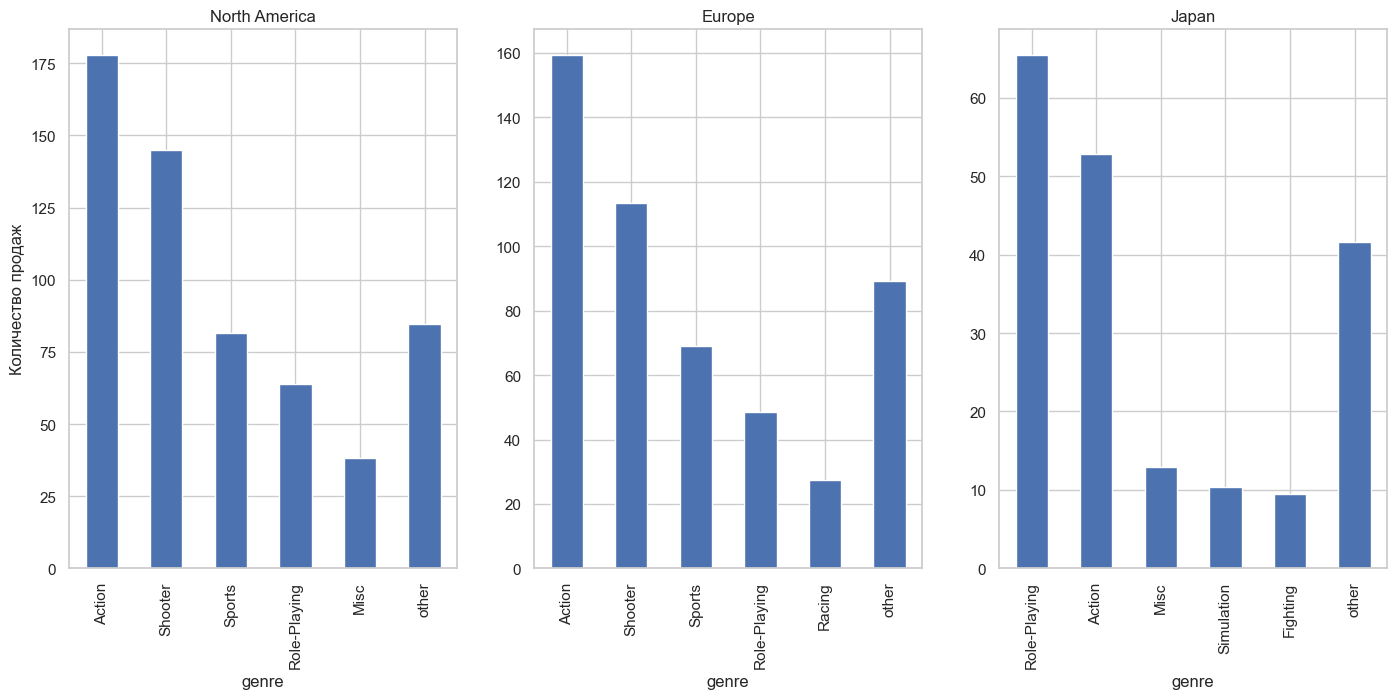

In [37]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_ylabel('Количество продаж')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

na_top_genres.plot(
    kind='bar',
    title='North America',
    label='',
    figsize=(17, 7),
    ax=ax1
);

eu_top_genres.plot(
    kind='bar',
    title='Europe',
    label='',
    ax=ax2
);

jp_top_genres.plot(
    kind='bar',
    title='Japan',
    label='',
    ax=ax3
);
plt.show()

- Portraits of users in America and Europe by genre are almost identical. Games `Action` , `Shooter` and `Sports` make up the top ratings.
- `Action` games account for roughly the same share of sales in Japan. But `Role-Playing` games are much (three times) more popular there than in other parts of the world.

The Japanese market is highlighted separately in the dataset, while Europe and North America are entire regions. Therefore, the perceived difference in the absolute number of sales is not surprising. The different distribution of popular genres is probably due to the strong cultural differences of this country from the rest of the world.

### ESRB `rating`

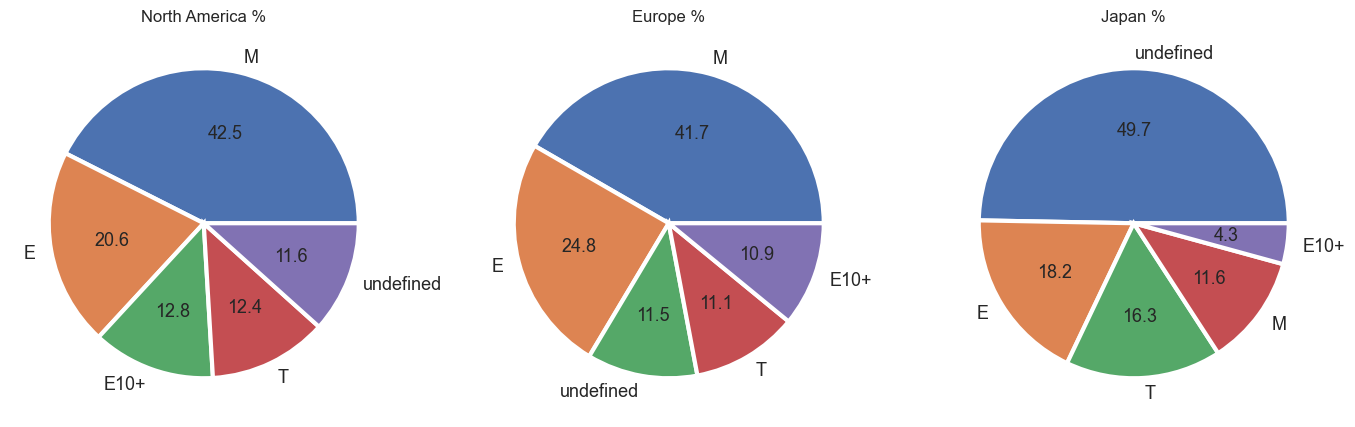

In [38]:
na_top_ratings = games_most.groupby('rating').na_sales.sum().sort_values(ascending=False).head()

eu_top_ratings = games_most.groupby('rating').eu_sales.sum().sort_values(ascending=False).head()

jp_top_ratings = games_most.groupby('rating').jp_sales.sum().sort_values(ascending=False).head()


fig = plt.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

na_top_ratings.plot(
    kind='pie',
    title='North America %',
    labels=(na_top_ratings.index),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    figsize=(17, 7),
    textprops={'fontsize': 13},
    ax=ax1
);

eu_top_ratings.plot(
    kind='pie',
    title='Europe %',
    labels=(eu_top_ratings.index),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    textprops={'fontsize': 13},
    ax=ax2
);

jp_top_ratings.plot(
    kind='pie',
    title='Japan %',
    labels=(jp_top_ratings.index),
    label='',
    wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
    autopct='%.1f',
    textprops={'fontsize': 13},
    ax=ax3
);

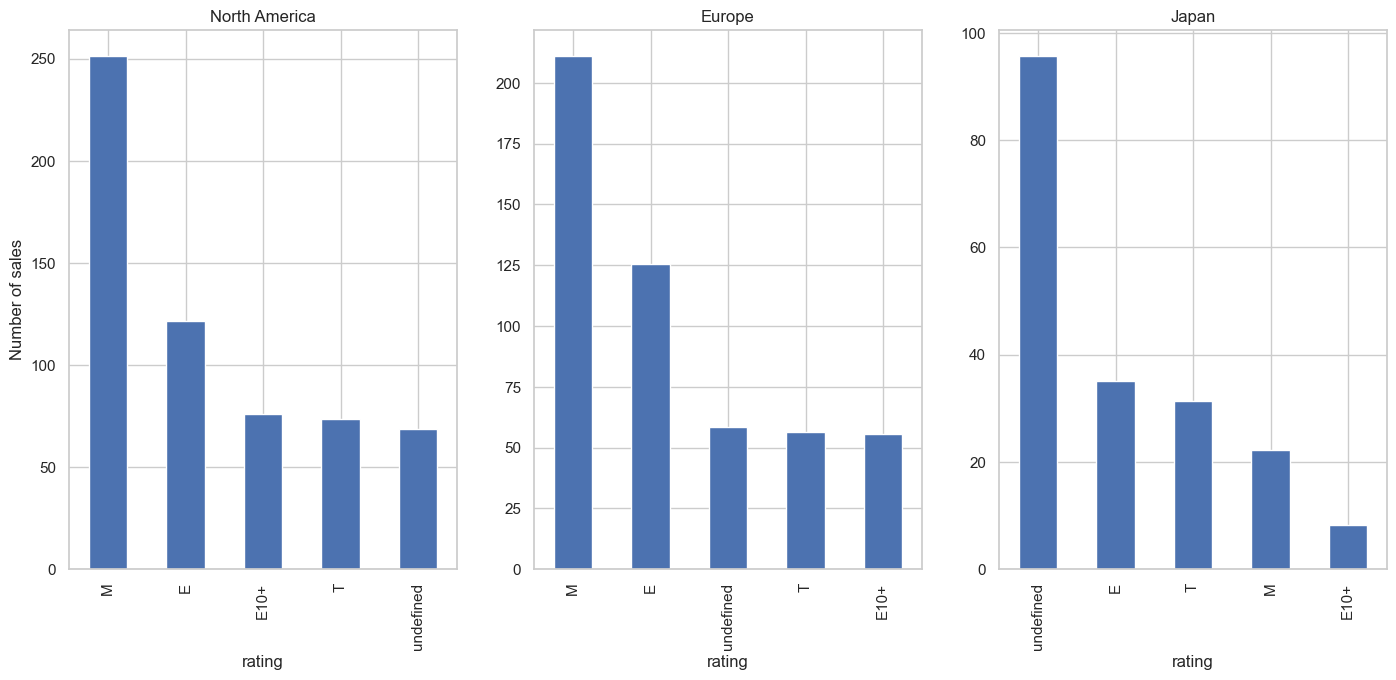

In [39]:
fig = plt.figure()

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_ylabel('Number of sales')
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

na_top_ratings.plot(
    kind='bar',
    title='North America',
    label='',
    figsize=(17, 7),
    ax=ax1
);

eu_top_ratings.plot(
    kind='bar',
    title='Europe',
    label='',
    ax=ax2
);

jp_top_ratings.plot(
    kind='bar',
    title='Japan',
    label='',
    ax=ax3
);
plt.show()

- The situation in America and Europe is similar again - sales distributions by age ratings are similar.
- In Japan, half of the distribution was occupied by the `undefined` category we created instead of passes. However, despite this, the following difference can be seen. In this country, games that do not contain swear words, as well as scenes of violence and erotic nature, are sold in larger numbers than in the rest of the world. Thus, the category Mature `M` (17+) is only 12% here against 40+% in America and Europe.

## Testing hypotheses
### Average user ratings for `Xbox One` and `PC` platforms are the same
First, let's check the normality of distributions using the Shapiro-Wilk test.

**H0**: The sample of Xbox One platform user rating values is normally distributed.\
**H1**: The sample of Xbox One platform user rating values is NOT normally distributed.

Before testing, we will remove the gaps in the data.

In [40]:
games_most = games_most.dropna()

In [41]:
sample1 = games_most[games_most.platform == 'XOne'].user_score

stat, p = st.shapiro(sample1)
print(f'stat = {stat:.3f}, p = {p:.3f}')
if p > 0.05:
    print('There is not enough reason to reject H0.')
else:
    print('There are enough reasons to reject H0. Accept H1.')

stat = 0.959, p = 0.000
There are enough reasons to reject H0. Accept H1.


**H0**: The sample of PC platform user rating values is normally distributed.\
**H1**: The sample of PC platform user rating values is NOT normally distributed.

In [42]:
sample2 = games_most[games_most.platform == 'PC'].user_score

stat, p = st.shapiro(sample2)
print(f'stat = {stat:.3f}, p = {p:.3f}')
if p > 0.05:
    print('There is not enough reason to reject H0.')
else:
    print('There are enough reasons to reject H0. Accept H1.')

stat = 0.940, p = 0.000
There are enough reasons to reject H0. Accept H1.


Both samples are NOT normally distributed. Let's use the nonparametric Mann-Whitney test to check the equality of the distributions of these two samples.

**H0**: The user rating distributions of the Xbox One and PC platforms are the same.\
**H1**: User rating distributions for Xbox One and PC platforms are different.

In [43]:
stat, p = st.mannwhitneyu(sample1, sample2)
print(f'stat = {stat:.3f}, p = {p:.3f}')
if p > 0.05:
    print('There is not enough reason to reject H0.')
else:
    print('There are enough reasons to reject H0. Accept H1.')

stat = 16001.500, p = 0.800
There is not enough reason to reject H0.


**User rating distributions for Xbox One and PC platforms are equal.**

### Average user ratings for `Action` and `Sports` genres are different
**H0**: The sample of user rating values for Action games is normally distributed.\
**H1**: The sample of user rating values for Action games is NOT normally distributed.

In [44]:
sample1 = games_most[games_most.genre == 'Action'].user_score

stat, p = st.shapiro(sample1)
print(f'stat = {stat:.3f}, p = {p:.3f}')
if p > 0.05:
    print('There is not enough reason to reject H0.')
else:
    print('There are enough reasons to reject H0. Accept H1.')

stat = 0.909, p = 0.000
There are enough reasons to reject H0. Accept H1.


In [45]:
sample2 = games_most[games_most.genre == 'Sports'].user_score

stat, p = st.shapiro(sample2)
print(f'stat = {stat:.3f}, p = {p:.3f}')
if p > 0.05:
    print('There is not enough reason to reject H0.')
else:
    print('There are enough reasons to reject H0. Accept H1.')

stat = 0.970, p = 0.004
There are enough reasons to reject H0. Accept H1.


The samples are NOT normally distributed. Let's use the Mann-Whitney test.

**H0**: User rating distributions for Action and Sports games are the same.\
**H1**: User rating distributions for Action and Sports games are different.

In [46]:
stat, p = st.mannwhitneyu(sample1, sample2)
print(f'stat = {stat:.3f}, p = {p:.3f}')
if p > 0.05:
    print('There is not enough reason to reject H0.')
else:
    print('There are enough reasons to reject H0. Accept H1.')

stat = 44734.500, p = 0.000
There are enough reasons to reject H0. Accept H1.


**The difference in user rating distributions for Action and Sports games is statistically significant.**

## General conclusion

Historical data on game sales, user and expert ratings, genres and gaming platforms for the period from 1980 to 2016 were analyzed. Some parameters contained a significant number of gaps. After processing them and bringing the data to the required types, the following conclusions were made.
- Until 1994, games were released extremely rarely. During this period, only ~2.2% of the total number of games were released. Half of all releases have happened in the last 10 years.
- The peak of the number of games produced per year was in 2008-2009, when it was about 1,400 games per year. At the moment, the decline that began from that time continues, and the output is at the level of 2001 (500 pieces / year).
- On average, the life cycle of a platform is approximately 10 years. The peak of sales usually occurs in its middle.
- There are currently three platforms leading the market: Xbox One, PlayStation 4 and Nintendo 3DS. When planning advertising campaigns for the next year, we should bet on games released specifically for these consoles.
- It is also worth considering that the rating of critics affects sales. Games that get less than 50 points on a 100-point scale are not worth considering - their success is almost impossible. Starting from 60 points, sales begin to exceed those of lower-rated games at times. 80+ points - potential market leaders with sales of over 10 million copies.
- Users' score, on the contrary, can be ignored - it does not affect the success of sales.
- Particular attention should be paid to games in the Shooter, Role-Playing and Sports genres. They are the most profitable.
- The user rating distributions of the Xbox One and PC platforms are equal.
- User rating distributions for Action and Sports games are different.

The following regional peculiarities were also noted.
- In North America, there is a marked preference for Microsoft platforms. Sales of games on Playstation in Europe account for half of the total. Games created for the Nintendo 3DS platform are not sold in Europe and America on a very large scale. At the same time, in Japan, this platform is the absolute leader.
- In America and Europe, the basis of sales are games in the genres of Action, Shooter and Sports. In Japan, role-playing games are much more popular than in the rest of the world.
- In Japan, games that do not contain swear words, as well as scenes of violence and erotic nature, are sold in larger circulations compared to North America and Europe.